# Decision Trees
The aim of this notebook is to implement your own decision tree and then apply it to a dataset.

## Part 1: About the Iris dataset
The Iris dataset is a dataset of flowers. Each flower has been classified and certain features have been measured for all flowers in the set.

The dataset consists of four dimensional feature vectors $(x_1,..,x_n)\in \mathbb{R}^4$ and corresponding target classes $(c_1,..,c_n)\in (0, 1, 2)$. The classes correspond to three different types of iris flowers:
* $1$ : Iris Setosa
* $2$ : Iris Versicolour
* $3$ : Iris Virginica

and the features correspond to different attributes that are shared across these flowers:
* $x_{1}$ is sepal length in centimeters
* $x_{2}$ is sepal width in centimeters
* $x_{2}$ is petal length in centimeters
* $x_{2}$ is petal width in centimeters

We will use decision trees to try to predict the type of flower, given the features of the flower.

## Part 3: Inspecting the data
To get a better feel for what we are working with, lets inspect the data. The data can be directly imported from sklearn in this case.

In [3]:
import sklearn.datasets as datasets
import numpy as np
# we also import matplotlib for plotting
import matplotlib.pyplot as plt
iris = datasets.load_iris()
# Commonly X is used to denote features and y to denote targets
X, y = iris.data, iris.target
# 0 Corresponds with Iris Setosa
# 1 Corresponds with Iris Versicolor
# 2 Corresponds with Iris Verginica
possible_classes = [0, 1, 2]

`X` and `y` are `numpy` arrays and we can use array operations to index and manipulate this data like any other `numpy` array.

In [4]:
# Get the first sample, i.e. the 0th sample
x_0, y_0 = X[0,:], y[0]
print("The features: ", x_0)
print("The target class: ",y_0)
# How many samples are there?
print(f"\nThere are {X.shape[0]} samples")
print(f"There are {len(np.where(y==0)[0])} Setosa samples")
print(f"There are {len(np.where(y==0)[0])} Versicolor samples")
print(f"There are {len(np.where(y==0)[0])} Virginica samples")

The features:  [5.1 3.5 1.4 0.2]
The target class:  0

There are 150 samples
There are 50 Setosa samples
There are 50 Versicolor samples
There are 50 Virginica samples


So the first flower is Iris Setosa and has measurements:
* sepal length: 5.1cm 
* sepal width: 3.5cm
* petal length: 1.4cm
* petal width: 0.2cm

We might wonder if there is any correlation between the type of flower and these measurements. Lets scatter just the first two features to get a better feel for how the data behaves.

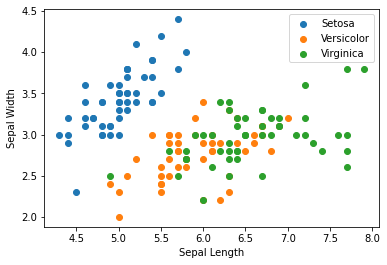

In [5]:
setosa_X = X[np.where(y==0), :][0]
versicolor_X = X[np.where(y==1), :][0]
virginica_X = X[np.where(y==2), :][0]

plt.scatter(setosa_X[:, 0], setosa_X[:, 1], label='Setosa')
plt.scatter(versicolor_X[:, 0], versicolor_X[:, 1], label='Versicolor')
plt.scatter(virginica_X[:, 0], virginica_X[:, 1], label='Virginica')
plt.legend()
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


**Question**: From just sepal width and sepal length, can we determine what the type of flower we have?

From just the data, we can see that the Setosa flower has a different ratio between the sepal width and length than the other two. The other two tend have long and narrow sepals and it would be difficult to determine, just from the sepal width and length, if we have a versicolor flower or a virginica flower.

What about the petal measurements then?

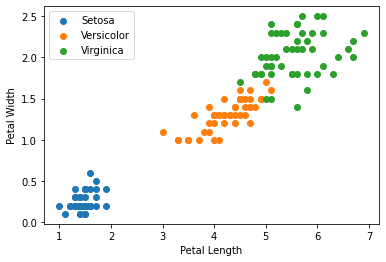

In [6]:
setosa_X = X[np.where(y==0), :][0]
versicolor_X = X[np.where(y==1), :][0]
virginica_X = X[np.where(y==2), :][0]

plt.scatter(setosa_X[:, 2], setosa_X[:, 3], label='Setosa')
plt.scatter(versicolor_X[:, 2], versicolor_X[:, 3], label='Versicolor')
plt.scatter(virginica_X[:, 2], virginica_X[:, 3], label='Virginica')
plt.legend()
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

## Part 4: What are Decision trees?
[See more here](https://en.wikipedia.org/wiki/Decision_tree_learning)

A decision tree is a statistical, predictive model. Decision trees are used to infer the class label, given a data point. In our case, we want to infer what kind of a flower we have, given the measurements of the petal and the sepal.

In essence, we can think about a decision tree as a bank of yes/no questions that the tree asks about the features. Given the answer to that question, the tree selects a sub-branch to go down. Eventually the tree hits the bottom of three, one of the leaves. Each leave corresponds with one class.

So in our example, these yes no questions might be for example:
* Is the petal length less than 2cm? (If yes, its probably a Setosa)
* Is the sepal width less than 3cm? (If yes, its probably not a Setosa)
* Is the ratio petal width / sepal width approximately 1.0? (If yes, its probably not a Setosa)

Thankfully we don't need to design these questions ourselves and we can just use `scikit` to find meaningful questions to ask for us. But lets first understand how scikit finds these questions.

### What makes a good yes/no question?
So we now understand that a decision tree repeatitly splits the data into different branches by considering yes/no questions about the features. But for the classification to be successful, we have to make sure that these questions are meaningful. So what makes a good question?

Entropy is a measure of disorder of a set of random variables. The higher the entropy the more disordered the data is. If we assume that a dataset can be classified given its features, then we want our yes no questions to split the dataset in such a way that the total entropy of the two subsets in the preceding branches is lower than the entropy of the set before we ask the question.

### How does the tree create these questions?
There are many approaches to this but `scikit` uses what is called parameter search to find good questions. In our case we have 4 features, petal/sepal length/width. We know the minimum and maximum value these features take in our dataset. For example, the petal length is somewhere between 1cm and 7cm. What `scikit` does is creates a range of values in this interval, e.g. (1cm, 1.1cm, 1.2cm, ..., 6.9cm, 7.0cm) and tests splitting the data with each value in this range. It then selects the value of the feature that results in the cleanest split.

![](./images/decision_tree.jpg)

This is an example of a decision tree for predicting whether a passenger died in the Titanic accident, using the following features:
* the gender of the passenger
* the age of the passenger
* how many siblings the passenger had

This is a rather simple decision tree and we can see that if:
* the gender is female, the tree predicts the passenger survives which is correct in 73% of cases
* Interestingly, if the passenger is older than 9.5 years and has less than 3 siblings, the probability of survival is very high.




## Part 5: Decision Trees using a naive dataset
Before we start work on the Iris dataset, it might be beneficial to create some fake data to play with. Lets start very simple.

We are going to create a classifier which predicts whether a vehicle is a car or not. In our world, a vehicle is a car only if:
* it has 4 wheels
* has 5 doors (the 5th is the trunk "door")

We will represent this with a feature set like the one in the Iris dataset, the first feature represent wheels, the second represents doors. Our dataset will have 150 samples, 30 of which are cars. Lets start by creating the cars:

In [7]:
cars = np.full((30, 2), (4, 5))
# print the first 5 cars:
print(cars[:5, :])

[[4 5]
 [4 5]
 [4 5]
 [4 5]
 [4 5]]


Now we create the other vehicles with random data. Other vehicles can have:
* 2-10 wheels
* 0-6 doors

In [8]:
wheels = np.random.randint(low=2, high=10, size=120)
doors = np.random.randint(low=0, high=6, size=120)
# we then combine the two to create the vehicles
vehicles = np.stack([wheels, doors], axis=1)
# print the first 5 vehicles
print(vehicles[:5, :])

[[7 4]
 [8 4]
 [2 5]
 [5 0]
 [9 4]]


We then combine the cars and other vehicles to create our dataset. We randomize the final array to ensure that any bias in terms of how the dataset is combined is removed.

We also create the labels for the dataset. If the vehicle is a car we give it a label 1, otherwise a label 0.

In [9]:
X = np.vstack([cars, vehicles])
y = np.concatenate([np.ones(30), np.zeros(120)])
# create a random permutation of the numbers between 0-150 and shuffle
# both arrays by this new index
p = np.random.permutation(X.shape[0])
X, y = X[p], y[p]

We now have our naive dataset and it's time to throw scikit at it.

The classification accuracy:  98.0


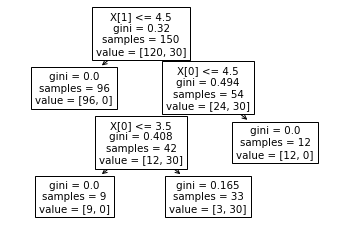

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()
clf.fit(X, y)
print("The classification accuracy: ", clf.score(X, y)*100)
plot_tree(clf)
plt.show()


So on this very simple data, our tree does a pretty good job, getting approximately 95% classification accuracy.
* The first question the tree comes up with is: Is the number of doors <= 4.5. 
    * We know that the answer is _no_ for all cars, which have 5 doors. 
    * Out of the 120 other vehicles, the answer is _yes_ for 95. This is therefore a very good question to ask to make the data more pure in the two branches that follow. However, the branch on the right now contains 30 cars and 25 other vehicles so the job is not finished.
* The next question is: Is the number of wheels <= 4.5
    * We know that the answer is _yes_ for all cars, which have 4 wheels.
    * Out of the 25 remaining vehicles, the answer is _yes_ for 12 of them.
* The final question the tree asks is: Is the number of wheels <= 3.5
    * We know that the answer is _no_ for all cars
    * This is also true for 7 other vehicles

This explains why the tree fails for ~5% of vehicles, they have been missclassified as non-cars in the dataset!

We can also tell `scikit` to have a maximum depth, which then limits the number of questions it can ask. Lets try to limit it to just 1.

The classification accuracy:  84.0


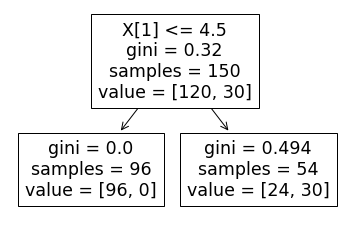

In [11]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X, y)
print("The classification accuracy: ", clf.score(X, y)*100)
plot_tree(clf)
plt.show()

`scikit` uses the same first question again and reaches an acceptable accuracy of ~83.3%. We however know that by simply asking if the vehicle has 4 wheels and 5 doors is a much more accurate question. But we must remember that the decision tree algorithm is not aware of the same facts we are.

Lets try creating a decision tree on the Iris dataset now.

The classification accuracy:  100.0


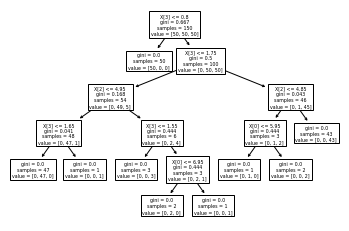

In [44]:
# load the Iris dataset again
X, y = iris.data, iris.target

clf = DecisionTreeClassifier()
clf.fit(X, y)
print("The classification accuracy: ", clf.score(X, y)*100)
plot_tree(clf)
plt.show()

So in this case we get a much more complicated tree with a maximum depth of 5. This means that for a subsection of the data, the tree has to ask 5 questions before it is able to determine what kind of flower we have.

An important thing to consider here is the bias-variance tradeoff. So far we have been feeding the whole dataset to the tree. The tree uses the dataset to make assumptions, finding questions that are likely to split up the data into it's seperate classes. But how does the tree fare against data that it has never seen before?

The bias-variance tradeoff is the tradeoff between underfitting and overfitting.
* Underfitting: The classifier has failed to make any meaningful assumptions about the data that is has seen. We therefore expect it to fail to make good assumptions about unseen data. (high bias)
* Overfitting: The classifier has become too confident in the assumptions it makes about the data it has seen. These assumptions tend to be very fine-grained, like we see in the tree above. These assumptions tend to fit badly to unseen data. (high variance)

We therefore aim to strike a balance between bias and variance and avoid overfitting to the data. To do that we have to split our dataset into:
* training data: The data the classifier sees when it tunes it's parameters
* test data: Data we have that the classifier never sees during training and is only used to evaluate the performance of the classifier.

Lets create the Iris decision tree again, but with a training set and then we test it out on a test set. We will also limit the depth of the tree to 4 to further reduce the risk of overfitting.

Number of training samples:  90
Number of testing samples:  59
The classification test accuracy:  96.61016949152543


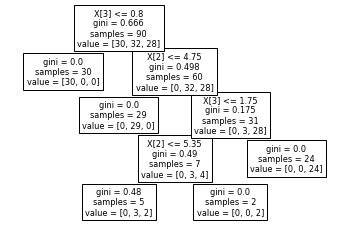

In [54]:
# load the Iris dataset again
X, y = iris.data, iris.target
num_samples = X.shape[0]
# randomize the data since it is in label order
np.random.seed(2021)
p = np.random.permutation(num_samples)
X, y = X[p], y[p]
# 60% will be training data, the rest is for testing
split_index = int(num_samples * 0.60)

train_X, train_y = X[0:split_index, :],  y[0:split_index]
test_X,  test_y  = X[split_index:-1, :], y[split_index: -1]

print("Number of training samples: ", train_X.shape[0])
print("Number of testing samples: ", test_X.shape[0])

clf = DecisionTreeClassifier(max_depth=4)
# we fit the tree to the training data
clf.fit(train_X, train_y)
# and test on the test set
print("The classification test accuracy: ", clf.score(test_X, test_y)*100)
plot_tree(clf)
plt.show()

So the accuracy is lower but we must remember that the tree earlier got tp see all of the data. We can also see that this is a much simpler tree with a maximum depth of 4, corresponding with the number of features. We can see that:
* The first question is whether the pedal width is <= 0.8. If so the tree says we have a Setosa flower.
* Next the tree asks if the petal length is <= 4.75. If so the tree puts most of the Versicolor flowers in that leaf.
* The rest of the questions are tuned to seperate a couple of Versicolor ones from Virginica flowers. You might argue that these last questions are signs of overfitting.

Lets try to limit the tree depth to only 2 since it seems to be able to seperate most of the data using only 2 questions.

The classification test accuracy:  93.22033898305084


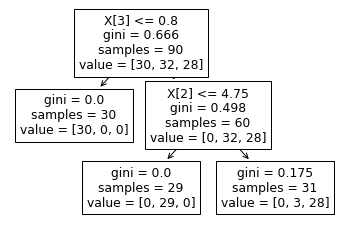

In [55]:
clf = DecisionTreeClassifier(max_depth=2)
# we fit the tree to the training data
clf.fit(train_X, train_y)
# and test on the test set
print("The classification test accuracy: ", clf.score(test_X, test_y)*100)
plot_tree(clf)
plt.show()

This seems to be the ideal tree for this dataset. It has only a marginally less test accuracy but is much less overfitted.

We know that the tree has an issue with seperating some Versicolor flowers from Virginica flowers but we can check this by looking at the confusion matrix.



In [58]:
from sklearn.metrics import confusion_matrix

# get the predictions the tree makes on the test set.
# C_{i,j} is the number of observations known to be in group i and predicted to be in group j.

y_test_predict = clf.predict(test_X)
print(confusion_matrix(test_y, y_test_predict))

[[20  0  0]
 [ 0 15  3]
 [ 0  1 20]]


Observations:
* All 20 Setosa samples are correctly classified
* 15 Versicolor sampes are correctly classfied, 3 are classified as Virginica
* 20 Virginica sampes are correctly classified, 1 is classified as Versicolor

We would therefore say that Setosa flowers are _fully_ seperable from the other two, while there seems to be a slight overlap between the other two.

## Part 6: Data Quantity
So we saw that when the tree has access to most of the data for training, it can reach a very high classification accuracy. But how does performance change w.r.t. the amount of samples it has for training?

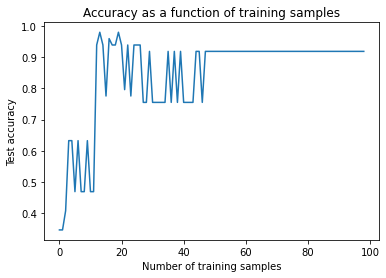

In [92]:
# we always use the same last 50 samples for testing
test_X, test_y = X[100:-1, :], y[100: -1]
accs = []
for num in range(1, 100):
    num_samples = X.shape[0]
    # randomize the data since it is in label order
    # 60% will be training data, the rest is for testing
    train_X, train_y = X[0:num, :],  y[0:num]
    clf = DecisionTreeClassifier(max_depth=2)
    # we fit the tree to the training data
    clf.fit(train_X, train_y)
    # and test on the test set
    accs.append(clf.score(test_X, test_y))

plt.plot(accs)
plt.title('Accuracy as a function of training samples')
plt.xlabel('Number of training samples')
plt.ylabel('Test accuracy')
plt.show()